# Step 1

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

%matplotlib inline
sns.set(style="white", font_scale=0.9)

boston = load_boston()

In [24]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [25]:
boston_df['target'] = boston.target

In [210]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [28]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

Currently there are no null columns in the dataset. 

In [29]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


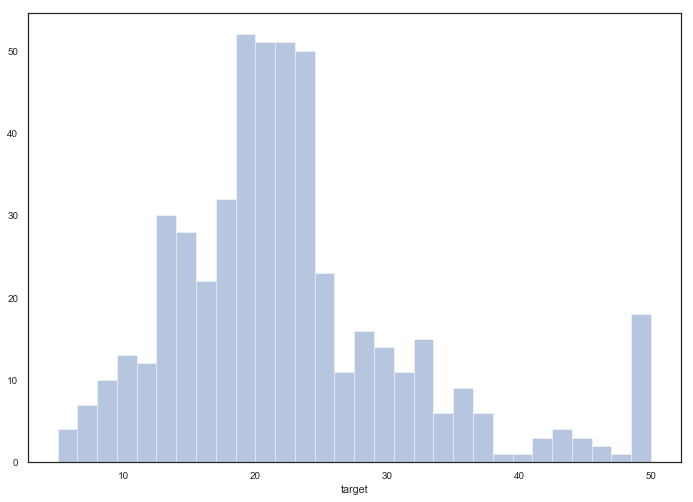

In [46]:
from matplotlib import pyplot
f1_dims = (11.7, 8.27)

fig, ax = pyplot.subplots(figsize=f1_dims)
dist = sns.distplot(boston_df['target'], bins = 30, kde = False)

plt.show()

In [201]:
x = boston_df.drop(['target'], axis = 1)

y = boston_df['target']

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .33, random_state = 1234)


In [203]:
results = pd.DataFrame(columns = ['Model', 'MSE', 'R2'])

In [204]:

lm = LinearRegression()

model = lm.fit(x_train,y_train)
y_pred_base = lm.predict(x_test)
mse = mean_squared_error(y_test, y_pred_base)
print("mse:", mse)
r2 = r2_score(y_test, y_pred_base)
print("r2:",r2)

base = "base"

results2 = pd.DataFrame([["base", mse, r2]],columns=['Model', 'MSE', 'R2'])

results = results.append(results2)


mse: 23.71805593584989
r2: 0.7371157374583572


# Step 2

In [85]:
import random
random.choice(list(x_train.columns))

'PTRATIO'

Ok, PTRATIO is pupil-teacher ratio by town. 

In [181]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
37,0.08014,0.0,5.96,0.0,0.499,5.850,41.5,3.9342,5.0,279.0,19.2,396.90,8.77
215,0.19802,0.0,10.59,0.0,0.489,6.182,42.4,3.9454,4.0,277.0,18.6,393.63,9.47
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
299,0.05561,70.0,2.24,0.0,0.400,7.041,10.0,7.8278,5.0,358.0,14.8,371.58,4.74
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59


In [105]:
import numpy as np

In [205]:


weight_set = {.01, .05, .10, .20, .33,.50}

for i in weight_set:
    x_train.loc[x_train.sample(frac= i).index, 'PTRATIO'] = np.nan
    x_train = x_train.replace(np.nan, x_train['PTRATIO'].mean())
    model = lm.fit(x_train,y_train)
    y_pred_base = lm.predict(x_test)
    mse = mean_squared_error(y_test, y_pred_base)
    print("mse:", mse)
    r2 = r2_score(y_test, y_pred_base)
    print("r2:",r2)
    iteration = "Step2_" + str(i) + " Imputation"
    results2 = pd.DataFrame([[iteration, mse, r2]],columns=['Model', 'MSE', 'R2'])
    results = results.append(results2)
    
    
    

mse: 23.622929093625807
r2: 0.7381700966281657
mse: 23.10860330865788
r2: 0.7438707390017709
mse: 22.946523603970338
r2: 0.7456671848721658
mse: 22.954998355571924
r2: 0.7455732531084903
mse: 22.339521625837747
r2: 0.7523950241105205
mse: 22.331721691169975
r2: 0.7524814763930582


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [209]:
results

,Model,MSE,R2
0,base,23.718056,0.737116
0,Step2_0.05 Imputation,23.622929,0.738170
0,Step2_0.1 Imputation,23.108603,0.743871
0,Step2_0.2 Imputation,22.946524,0.745667
0,Step2_0.33 Imputation,22.954998,0.745573
0,Step2_0.5 Imputation,22.339522,0.752395
0,Step2_0.01 Imputation,22.331722,0.752481
